In [5]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='y-hWKQEmvOoWBDJAbK5YgepYBH1u5Fyvh-SluVlxDD2K',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'fruitset-donotdelete-pr-8fqk5yezvb2gvm'
object_key = 'Fertilizers_Recommendation_ System_For_Disease_ Prediction.zip'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [6]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_1.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)


In [7]:
pwd

'/home/wsuser/work'

In [10]:
import os
filenames=os.listdir('/home/wsuser/work/Dataset Plant Disease/fruit-dataset/fruit-dataset/train')
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [11]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
test_datagen=ImageDataGenerator(rescale=1./255)

In [12]:
path_train = '/home/wsuser/work/Dataset Plant Disease/fruit-dataset/fruit-dataset/train'
path_test = '/home/wsuser/work/Dataset Plant Disease/fruit-dataset/fruit-dataset/test'

In [13]:
x_train=train_datagen.flow_from_directory(path_train,target_size=(128,128),
                                        class_mode='categorical',batch_size=24)
x_test=test_datagen.flow_from_directory(path_test,target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 5384 images belonging to 6 classes.
Found 1686 images belonging to 6 classes.


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [15]:
model=Sequential()

In [16]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

32*(3*3*3+1)
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(6,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
 dense (Dense)               (None, 300)               38102700  
                                                                 
 dense_1 (Dense)             (None, 150)               45150     
                                                                 
 dense_2 (Dense)             (None, 6)                 906       
                                                        

In [17]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
len(x_train)

225

In [18]:
history=model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10
225/225 [==============================] - 113s 501ms/step - loss: 0.9218 - accuracy: 0.7788 - val_loss: 0.2459 - val_accuracy: 0.9134
Epoch 2/10
225/225 [==============================] - 117s 519ms/step - loss: 0.2876 - accuracy: 0.9027 - val_loss: 0.1909 - val_accuracy: 0.9318
Epoch 3/10
225/225 [==============================] - 114s 506ms/step - loss: 0.2261 - accuracy: 0.9207 - val_loss: 0.2000 - val_accuracy: 0.9353
Epoch 4/10
225/225 [==============================] - 113s 500ms/step - loss: 0.1692 - accuracy: 0.9421 - val_loss: 0.2397 - val_accuracy: 0.9229
Epoch 5/10
225/225 [==============================] - 114s 507ms/step - loss: 0.1451 - accuracy: 0.9486 - val_loss: 0.3178 - val_accuracy: 0.9021
Epoch 6/10
225/225 [==============================] - 113s 502ms/step - loss: 0.1293 - accuracy: 0.9539 - val_loss: 0.1389 - val_accuracy: 0.9549
Epoch 7/10
225/225 [==============================] - 112s 499ms/step - loss: 0.0918 - accuracy: 0.9681 - val_loss: 0.5412 -

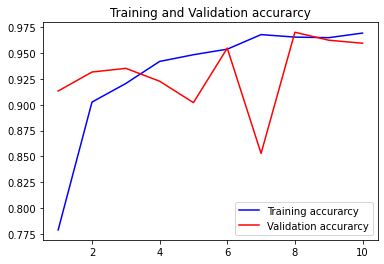

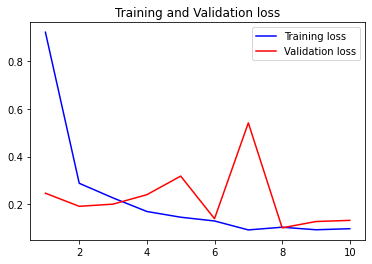

In [19]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [20]:
train_loss,train_acc = model.evaluate(x_train,steps = 16)
validation_loss,test_acc = model.evaluate(x_test,steps = 16)

16/16 [==============================] - 2s 116ms/step - loss: 0.0959 - accuracy: 0.9609


In [47]:
print('Train:%.3f,Test:%.3f'%(train_acc,test_acc))

Train:0.953,Test:0.961


In [48]:
model.save('fruitdata.h5')

In [52]:
!tar -zcvf Fruit-model_new.tgz fruitdata.h5

fruitdata.h5


In [53]:
ls

'Dataset Plant Disease'/   Fruit-model_new.tgz   Vegetable_model.tgz
 fruitdata.h5              Fruit_model.tgz


In [54]:
from ibm_watson_machine_learning import APIClient

wml_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"05uo63K5zf6ZHBrB1fp-8GrvEKNdjzG5jzACeU6vOC7e"
}
client=APIClient(wml_credentials)

In [55]:
def guid_from_space_name(client,space_name):
    space=client.spaces.get_details()
    return (next(item for item in space['resources']if item ['entity']["name"] == space_name)['metadata']['id'])
space_uid=guid_from_space_name(client,'Fruit_Set')
print("SPACE_UID = "+space_uid)

SPACE_UID = 68f26b49-f681-4650-b3c1-e5f4c18d0534


In [56]:
client.set.default_space(space_uid)

'SUCCESS'

In [57]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [76]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [77]:
!pip install tensorflow

In [75]:
software_spec_uid=client.software_specifications.get_uid_by_name("tensorflow_1.15-py3.6")
software_spec_uid

'65e171d7-72d1-55d9-8ebb-f813d620c9bb'

In [80]:
from keras.models import load_model
from keras.preprocessing import image
from PIL import Image
model=load_model("fruitdata.h5")

In [86]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='y-hWKQEmvOoWBDJAbK5YgepYBH1u5Fyvh-SluVlxDD2K',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'fruitset-donotdelete-pr-8fqk5yezvb2gvm'
object_key = '01a8cc9f-074a-4866-87c8-bb5a9e3895b4___RS_LB 2968.JPG'

streaming_body_2 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [87]:
from PIL import Image
img=Image.open(streaming_body_2)
target_size=(128,128)
img=img.resize(target_size)
import numpy as np
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred=model.predict(x)
y=np.argmax(pred,axis=1)
index=['Apple___Black_rot','Apple___healthy','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Peach___Bacterial_spot','Peach___healthy']
index[y[0]]

'Apple___healthy'